In [1]:
from agrifoodpy_data.land import UKCEH_LC_1000 as LC
from agrifoodpy.land.land import LandDataArray
from geocube.api.core import make_geocube
import geopandas as gpd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches

In [2]:
lc_dominant_target = LC.dominant_target
lc_dominant_aggregate = LC.dominant_aggregate

In [3]:
yorkshire_council_names = [
    "York",
    "Craven",
    "Hambleton",
    "Harrogate",
    "Richmondshire",
    "Ryedale",
    "Scarborough",
    "Selby",
    "Bradford",
    "Calderdale",
    "Kirklees",
    "Leeds",
    "Wakefield",
    "East Riding of Yorkshire",
    "Kingston upon Hull, City of",
    "Barnsley",
    "Doncaster",
    "Rotherham",
    "Sheffield",
]

In [4]:
LA = gpd.read_file("data/Local_Authority_Districts_December_2021_UK_BUC_2022_8985961432220200008.gpkg")

# Create value column and assign Value=1 to LA in Yorkshire
LA["Value"] = np.nan
LA["Value"][LA["LAD21NM"].isin(yorkshire_council_names)] = 1
LA.head()

/tmp/ipykernel_574683/929815941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA["Value"][LA["LAD21NM"].isin(yorkshire_council_names)] = 1


,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Value
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.676140,{BF65113C-1876-465F-AE00-E3A8D1D818E5},"MULTIPOLYGON (((448906.042 536703.720, 448290....",NaN
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544670,{8B114FF8-DA9A-4C1F-A140-63A64AA4A255},"MULTIPOLYGON (((451894.353 521145.363, 448410....",NaN
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,{CDDD1300-1DB4-41D0-B8CA-E39EEA3D7A5B},"MULTIPOLYGON (((478227.056 518780.442, 478074....",NaN
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,{2AD7A998-C3F1-40F5-A229-3C4CBEA47A6E},"MULTIPOLYGON (((452185.284 526288.464, 451148....",NaN
4,E06000005,Darlington,,428029,515648,-1.56835,54.535339,{80E1EF48-63CF-47AA-9536-A0F7195012B2},"MULTIPOLYGON (((436388.002 522354.197, 435529....",NaN


<Axes: >

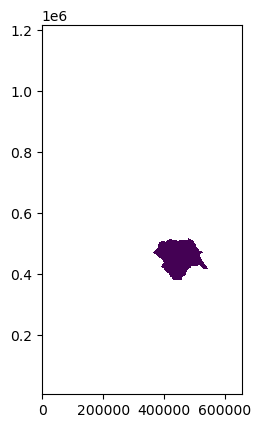

In [5]:
out_grid = make_geocube(
    vector_data=LA,
    measurements=['Value'],
    resolution=(1000, 1000), # in km, as the original CRS is in meters
)
out_grid.Value.land.plot()

In [6]:
yorkshire_dominant_target = lc_dominant_target.where(out_grid.Value==1)
yorkshire_dominant_aggregate = lc_dominant_aggregate.where(out_grid.Value==1)

In [7]:
# Get extents of original yorkshire map
yorkshire_ext = LA[LA["LAD21NM"].isin(yorkshire_council_names)].geometry.unary_union.bounds
yorkshire_ext = np.array(yorkshire_ext)
yorkshire_ext

array([363191.2027, 378555.0991, 542221.9434, 518780.4419])

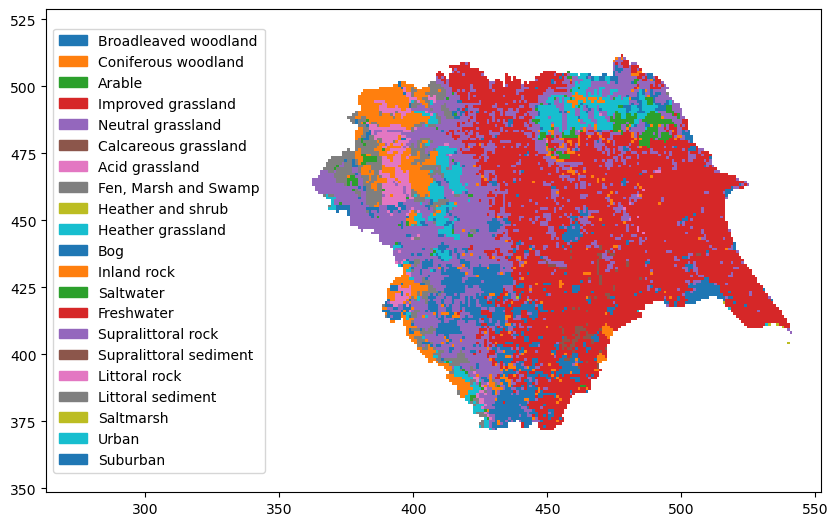

In [12]:
label_list = LC.target_class.values
color_list = [f"C{i}" for i in range(len(label_list))]

cmap_target = colors.ListedColormap(color_list)
bounds_tar = np.linspace(-0.5, len(color_list)-0.5, len(color_list)+1)
norm_tar = colors.BoundaryNorm(bounds_tar, cmap_target.N)

f, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(yorkshire_ext[0]/1000-100, yorkshire_ext[2]/1000+10)
ax.set_ylim(yorkshire_ext[1]/1000-30, yorkshire_ext[3]/1000+10)
ax.imshow(yorkshire_dominant_target, interpolation="none", origin="lower",
          cmap=cmap_target, norm=norm_tar)

patches = [mpatches.Patch(color=color_list[i], label=label_list[i]) for i in range(len(label_list))]
ax.legend(handles=patches, loc="center left")

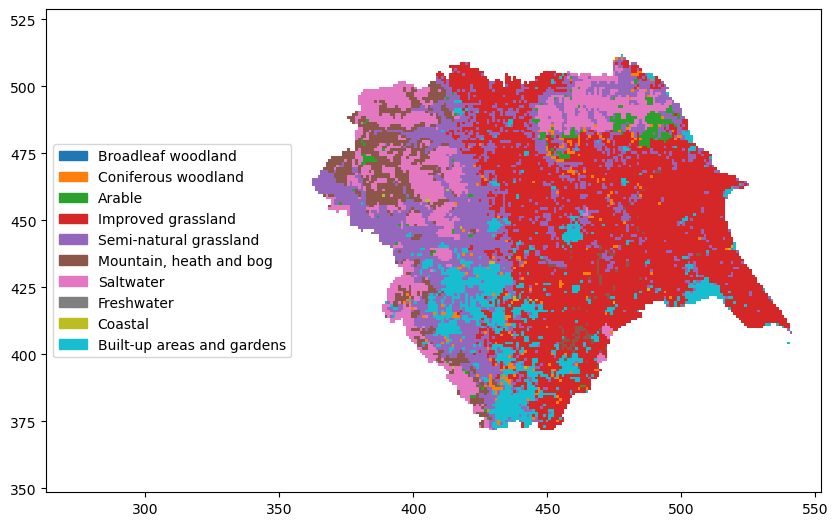

In [13]:

label_list = LC.aggregate_class.values
color_list = [f"C{i}" for i in range(len(label_list))]

cmap_target = colors.ListedColormap(color_list)
bounds_tar = np.linspace(-0.5, len(color_list)-0.5, len(color_list)+1)
norm_tar = colors.BoundaryNorm(bounds_tar, cmap_target.N)

f, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(yorkshire_ext[0]/1000-100, yorkshire_ext[2]/1000+10)
ax.set_ylim(yorkshire_ext[1]/1000-30, yorkshire_ext[3]/1000+10)
ax.imshow(yorkshire_dominant_aggregate, interpolation="none", origin="lower",
          cmap=cmap_target, norm=norm_tar)

patches = [mpatches.Patch(color=color_list[i], label=label_list[i]) for i in range(len(label_list))]
ax.legend(handles=patches, loc="center left")